Copyright (c) 2022 Mayur Khandetod

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Abstract:

Aim: To develop a prediction model that can determine whether a patient has lung cancer based on a set of risk indicators. 

Description of data set: This dataset contains a List of Risk Factors for Lung Cancer. Based on the input values listed below, this dataset is used to forecast if a patient is likely to get lung cancer. Each row of data in the table contains pertinent information about the patient. 

Description of fields: • Gender: 1(male), 0(female) • Age: Age of the patient • Smoking: YES=2 , NO=1. • Yellow fingers: YES=2 , NO=1. • Anxiety: YES=2 , NO=1. • Peer_pressure: YES=2 , NO=1. • Chronic Disease: YES=2 , NO=1. • Fatigue: YES=2 , NO=1. • Allergy: YES=2 , NO=1. • Wheezing: YES=2 , NO=1. • Alcohol: YES=2 , NO=1. • Coughing: YES=2 , NO=1. • Shortness of Breath: YES=2 , NO=1. • Swallowing Difficulty: YES=2 , NO=1. • Chest pain: YES=2 , NO=1. • Lung Cancer: YES=2 , NO=1.

Imported required libraries and train, test dataset. Import dataset using pandas. Observed dataset and plotted histogram, boxplots. Split the data in training and test sets. Set the features and target. Train model using Logistic Regression, Random Forest and XGBoost. Plotted feature importance for all models. Find best model accuracy. Plot correlation matrix & heat map. Compute p-value. Plotted confusion matrix.

In [93]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np 
#plotting data and create visualization
import matplotlib.pyplot as plt           
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

from xgboost import XGBClassifier
from xgboost import plot_importance

In [94]:
#reads csv and stores dataset as dataframe
lung_df=pd.read_csv("https://raw.githubusercontent.com/MayurAvinash/DESM_INFO6105/main/surveylungcancer.csv")

**1. What are the data types? (Only numeric and categorical)**

Ans: We may deduce from the dataset that it has 15 independent variables and one target variable. 'AGE', for example, has a numeric data type that represents some sort of quantitative measurement. All other variables have categorical data types, which represent qualitative data with no apparent mathematical meaning. In this dataset, for example, YES=2 and NO=1.

In [95]:
#displays first 10 rows of dataset
lung_df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
5,1,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,0,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,1,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,1,68,2,1,2,1,1,2,1,1,1,1,1,1,1,2
9,0,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [96]:
#displays information about the dataset
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55394 entries, 0 to 55393
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 55394 non-null  int64
 1   AGE                    55394 non-null  int64
 2   SMOKING                55394 non-null  int64
 3   YELLOW_FINGERS         55394 non-null  int64
 4   ANXIETY                55394 non-null  int64
 5   PEER_PRESSURE          55394 non-null  int64
 6   CHRONIC_DISEASE        55394 non-null  int64
 7   FATIGUE                55394 non-null  int64
 8   ALLERGY                55394 non-null  int64
 9   WHEEZING               55394 non-null  int64
 10  ALCOHOL_CONSUMING      55394 non-null  int64
 11  COUGHING               55394 non-null  int64
 12  SHORTNESS_OF_BREATH    55394 non-null  int64
 13  SWALLOWING_DIFFICULTY  55394 non-null  int64
 14  CHEST_PAIN             55394 non-null  int64
 15  LUNG_CANCER            55394 non-nul

In [97]:
#displays information about numerical columns only
lung_df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000
mean,0.502004,44.137614,1.499531,1.496299,1.500614,1.496769,1.501047,1.497924,1.501914,1.501065,1.498447,1.505055,1.500758,1.499964,1.501643,1.496101
std,0.500000,15.309217,0.500004,0.499991,0.500004,0.499994,0.500003,0.500000,0.500001,0.500003,0.500002,0.499979,0.500004,0.500005,0.500002,0.499989
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**5. Which independent variables have missing data? How much?** 

Ans: As we can see below no independent variables have missing data. The isnull() method confirms that both the missing value and "NA" were identified as missing values.

In [98]:
lung_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

**3. What are the likely distributions of the numeric variables?**

Ans: The likely distributions of numeric variable i.e. 'AGE' is displayed below with the help of histogram and boxplot. Both the plots shows that 'AGE' has uniform distribution. 

**10. What are the distributions of the predictor variables?**

Ans: All predictor variables, excluding 'AGE,' have Bernoulli distribution, as they have discrete values such as 0 ,1 or 1,2 whereas 'AGE' has uniform distribution, as shown in the histogram and boxplots below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4297007390>,
      dtype=object)

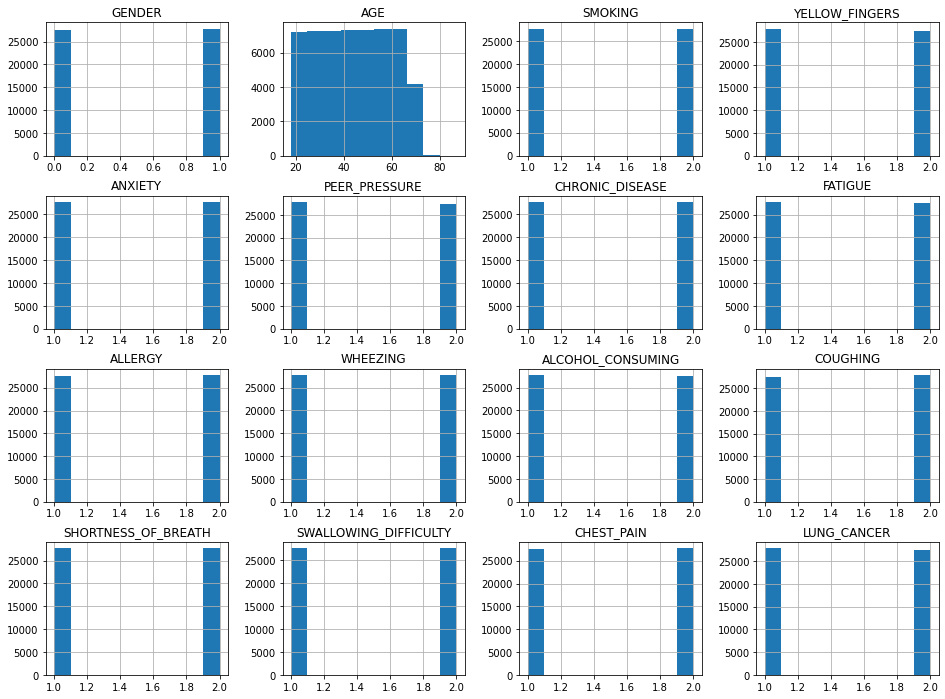

In [99]:
lung_df.hist(figsize=(16,12))

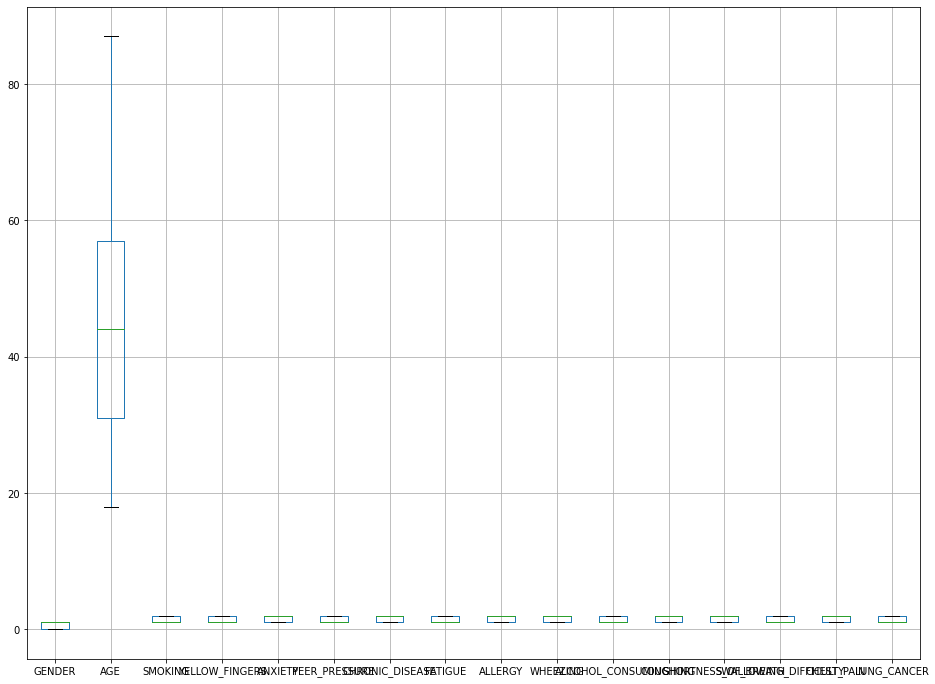

In [100]:
lung_df.boxplot(figsize=(16,12))

**2. Are there missing values?**

Ans: We can see that there are no missing or null values in the dataset by looking at the data below for all columns. This is because the isnull() method confirms that both the missing value and "NA" were identified as missing values.

In [101]:
lung_df['GENDER'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: GENDER, Length: 55394, dtype: bool

In [102]:
lung_df['AGE'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: AGE, Length: 55394, dtype: bool

In [103]:
lung_df['SMOKING'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: SMOKING, Length: 55394, dtype: bool

In [104]:
lung_df['YELLOW_FINGERS'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: YELLOW_FINGERS, Length: 55394, dtype: bool

In [105]:
lung_df['ANXIETY'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: ANXIETY, Length: 55394, dtype: bool

In [106]:
lung_df['PEER_PRESSURE'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: PEER_PRESSURE, Length: 55394, dtype: bool

In [107]:
lung_df['CHRONIC_DISEASE'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: CHRONIC_DISEASE, Length: 55394, dtype: bool

In [108]:
lung_df['FATIGUE'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: FATIGUE, Length: 55394, dtype: bool

In [109]:
lung_df['ALLERGY'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: ALLERGY, Length: 55394, dtype: bool

In [110]:
lung_df['WHEEZING'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: WHEEZING, Length: 55394, dtype: bool

In [111]:
lung_df['ALCOHOL_CONSUMING'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: ALCOHOL_CONSUMING, Length: 55394, dtype: bool

In [112]:
lung_df['COUGHING'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: COUGHING, Length: 55394, dtype: bool

In [113]:
lung_df['SHORTNESS_OF_BREATH'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: SHORTNESS_OF_BREATH, Length: 55394, dtype: bool

In [114]:
lung_df['SWALLOWING_DIFFICULTY'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: SWALLOWING_DIFFICULTY, Length: 55394, dtype: bool

In [115]:
lung_df['CHEST_PAIN'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
55389    False
55390    False
55391    False
55392    False
55393    False
Name: CHEST_PAIN, Length: 55394, dtype: bool

In [116]:
y= lung_df.LUNG_CANCER

In [117]:
x=lung_df.drop('LUNG_CANCER',axis=1)

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**9. Do the ranges of the predictor variables make sense?**

Ans: By referring below table, the ranges of the predictor variables does makes sense. For example, for AGE min value is 18 and max value is 87.

In [119]:
x_train.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000,44315.000000
mean,0.502742,44.108158,1.499267,1.496356,1.500846,1.496852,1.501817,1.498161,1.500124,1.501027,1.500327,1.506600,1.499109,1.497822,1.502358
std,0.499998,15.334482,0.500005,0.499992,0.500005,0.499996,0.500002,0.500002,0.500006,0.500005,0.500006,0.499962,0.500005,0.500001,0.500000
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**6. Do the training and test sets have the same data?**

Ans: As per below data and graphs here we can see that all predictor and target variables have same test and train data.

In [120]:
x_train.GENDER.unique()

array([1, 0])

In [121]:
x_test.GENDER.unique()

array([0, 1])

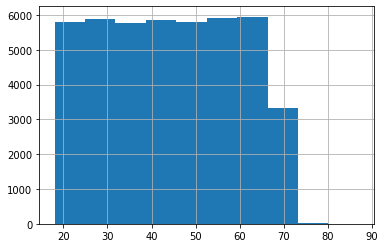

In [122]:
x_train['AGE'].hist()

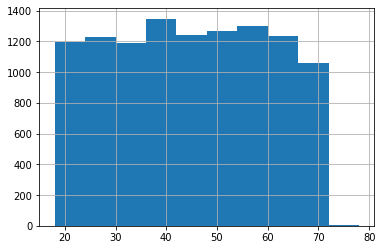

In [123]:
x_test['AGE'].hist()

In [124]:
x_train.SMOKING.unique()

array([1, 2])

In [125]:
x_test.SMOKING.unique()

array([1, 2])

In [126]:
x_train.YELLOW_FINGERS.unique()

array([1, 2])

In [127]:
x_test.YELLOW_FINGERS.unique()

array([1, 2])

In [128]:
x_train.ANXIETY.unique()

array([1, 2])

In [129]:
x_test.ANXIETY.unique()

array([1, 2])

In [130]:
x_train.PEER_PRESSURE.unique()

array([2, 1])

In [131]:
x_test.PEER_PRESSURE.unique()

array([1, 2])

In [132]:
x_train.CHRONIC_DISEASE.unique()

array([1, 2])

In [133]:
x_test.CHRONIC_DISEASE.unique()

array([2, 1])

In [134]:
x_train.FATIGUE.unique()

array([1, 2])

In [135]:
x_test.FATIGUE.unique()

array([2, 1])

In [136]:
x_train.ALLERGY.unique()

array([2, 1])

In [137]:
x_test.ALLERGY.unique()

array([1, 2])

In [138]:
x_train.WHEEZING.unique()

array([2, 1])

In [139]:
x_test.WHEEZING.unique()

array([2, 1])

In [140]:
x_train.ALCOHOL_CONSUMING.unique()

array([1, 2])

In [141]:
x_test.ALCOHOL_CONSUMING.unique()

array([2, 1])

In [142]:
x_train.COUGHING.unique()

array([2, 1])

In [143]:
x_test.COUGHING.unique()

array([1, 2])

In [144]:
x_train.SHORTNESS_OF_BREATH.unique()

array([2, 1])

In [145]:
x_test.SHORTNESS_OF_BREATH.unique()

array([1, 2])

In [146]:
x_train.SWALLOWING_DIFFICULTY.unique()

array([1, 2])

In [147]:
x_test.SWALLOWING_DIFFICULTY.unique()

array([2, 1])

In [148]:
x_train.CHEST_PAIN.unique()

array([1, 2])

In [149]:
x_test.CHEST_PAIN.unique()

array([1, 2])

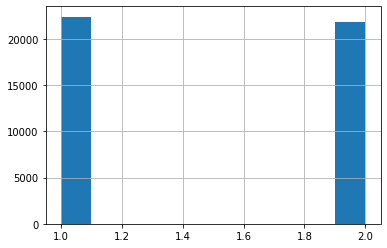

In [150]:
y_train.hist()

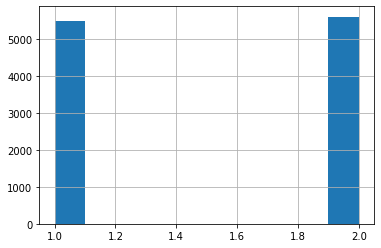

In [151]:
y_test.hist()

**7. In the predictor variables independent of all the other predictor variables?**

Ans: Values close to 1 are positively correlated, values close to -1 are negatively correlated and values close to 0 does not have linear relationship with each other. By looking at the above correlation matrix we can conclude that no two variables are highly correlated to each other.



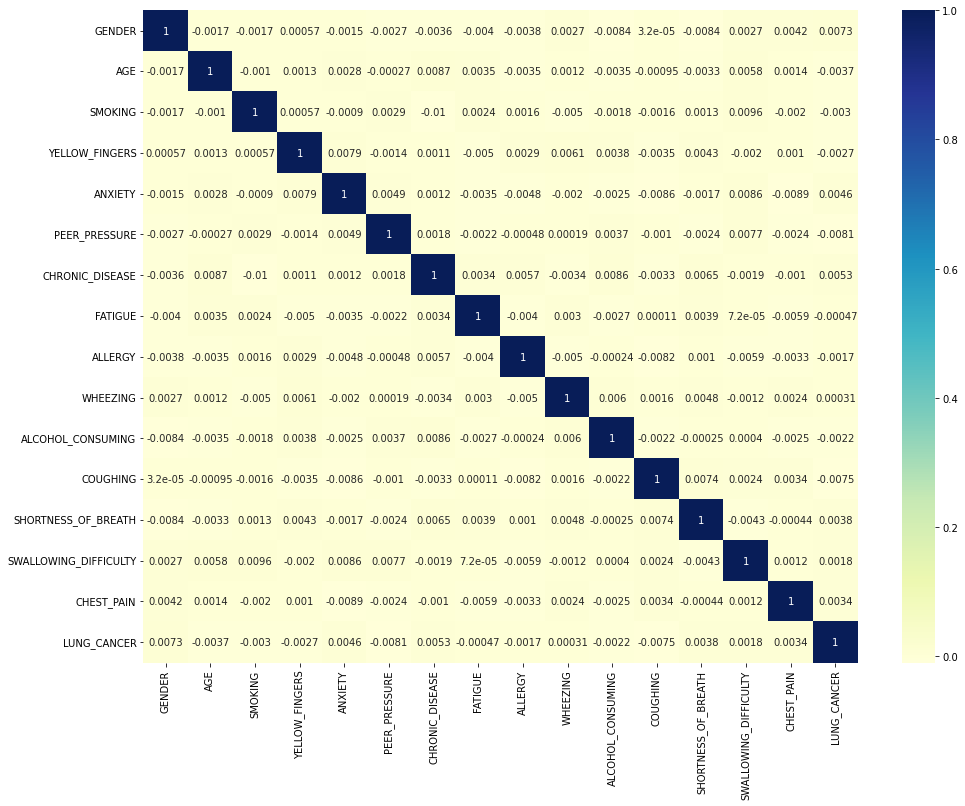

In [152]:
plt.figure(figsize=(16, 12))
sns.heatmap(lung_df.corr(), annot=True, cmap="YlGnBu")

In [153]:
lung_df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,-0.001740,-0.001729,0.000571,-0.001521,-0.002682,-0.003619,-0.003991,-0.003843,0.002699,-0.008436,0.000032,-0.008383,0.002744,0.004211,0.007253
AGE,-0.001740,1.000000,-0.001042,0.001289,0.002827,-0.000269,0.008720,0.003498,-0.003469,0.001161,-0.003461,-0.000948,-0.003281,0.005846,0.001377,-0.003676
SMOKING,-0.001729,-0.001042,1.000000,0.000571,-0.000901,0.002882,-0.009999,0.002379,0.001556,-0.004981,-0.001844,-0.001615,0.001337,0.009568,-0.002019,-0.003004
YELLOW_FINGERS,0.000571,0.001289,0.000571,1.000000,0.007880,-0.001384,0.001099,-0.004977,0.002917,0.006118,0.003804,-0.003536,0.004272,-0.001950,0.000999,-0.002730
ANXIETY,-0.001521,0.002827,-0.000901,0.007880,1.000000,0.004918,0.001189,-0.003461,-0.004807,-0.002025,-0.002487,-0.008642,-0.001699,0.008629,-0.008886,0.004595
PEER_PRESSURE,-0.002682,-0.000269,0.002882,-0.001384,0.004918,1.000000,0.001819,-0.002229,-0.000481,0.000194,0.003735,-0.001018,-0.002373,0.007726,-0.002398,-0.008138
CHRONIC_DISEASE,-0.003619,0.008720,-0.009999,0.001099,0.001189,0.001819,1.000000,0.003403,0.005661,-0.003398,0.008563,-0.003307,0.006532,-0.001913,-0.001018,0.005324
FATIGUE,-0.003991,0.003498,0.002379,-0.004977,-0.003461,-0.002229,0.003403,1.000000,-0.003956,0.003006,-0.002685,0.000114,0.003906,0.000072,-0.005944,-0.000466
ALLERGY,-0.003843,-0.003469,0.001556,0.002917,-0.004807,-0.000481,0.005661,-0.003956,1.000000,-0.004991,-0.000241,-0.008163,0.001041,-0.005885,-0.003262,-0.001739
WHEEZING,0.002699,0.001161,-0.004981,0.006118,-0.002025,0.000194,-0.003398,0.003006,-0.004991,1.000000,0.006000,0.001567,0.004763,-0.001227,0.002412,0.000305


**4. Which independent variables are useful to predict a target (dependent variable)?**

Ans: The 3 methods used to identify useful independent variables are: 

1)Logistic regression : Greater coefficient in both positive and negative direction has more influence on target variable. Therefore, according to this method, the most essential features are **CHEST_PAIN** and **PEER PRESSURE**.

2)RandomForestClassifier : The feature importance of each of the variables can be obtained using the Random Forest approach. In order to predict the dependent variable, this strategy prioritizes **AGE**, **FATIGUE**, and **ALLERGY**.

3)XGBClassifier : While calculating feature importance, XGBoost captures the relationship between various factors. It is usually far more accurate than Random Forest in terms of feature importance. According to this method, **AGE**, **SMOKING**, **ANXIETY** have importance in the order mentioned.

In [154]:
# fit Logistic Regression model to training data
lr = LogisticRegression()
lr_fit = lr.fit(x_train,y_train)

# fit Random Forest model to training data
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

# fit XGBoost model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(x_train, y_train)

XGBClassifier()

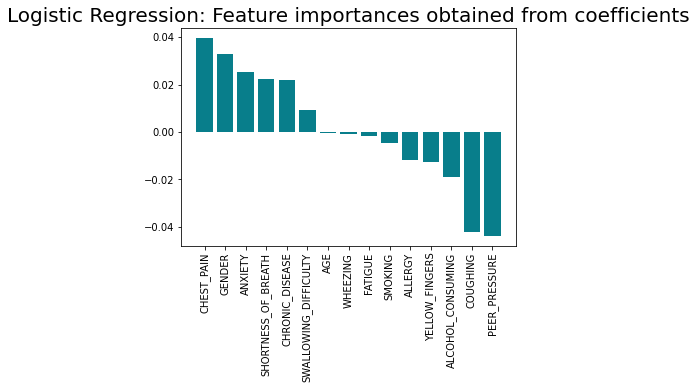

In [155]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Logistic Regression: Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

XGBOOST Feature Importances :  [0.05659812 0.07645325 0.05696076 0.07710505 0.08343842 0.05501546
 0.03039381 0.11074726 0.07164478 0.05831063 0.08851107 0.03729019
 0.05076251 0.061315   0.08545371]


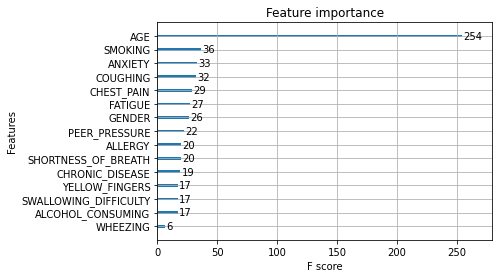

In [156]:
print("XGBOOST Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

Random Forest Feature Ranking:
1. AGE (0.501808)
2. FATIGUE (0.040615)
3. ALLERGY (0.038477)
4. YELLOW_FINGERS (0.037769)
5. WHEEZING (0.037363)
6. ALCOHOL_CONSUMING (0.036905)
7. CHRONIC_DISEASE (0.036670)
8. SWALLOWING_DIFFICULTY (0.036369)
9. SMOKING (0.036218)
10. ANXIETY (0.036100)
11. SHORTNESS_OF_BREATH (0.035689)
12. COUGHING (0.033740)
13. GENDER (0.033390)
14. PEER_PRESSURE (0.029651)
15. CHEST_PAIN (0.029237)


<BarContainer object of 15 artists>

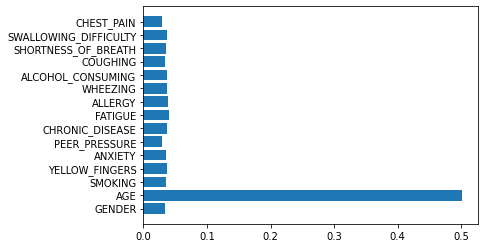

In [157]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

print('Random Forest Feature Ranking:')

for f in range(x_train.shape[1]):
  print('%d. %s (%f)'% (f+1, x_train.columns[indices[f]], importances[indices[f]]))

# plot feature importance
plt.barh(x_train.columns , importances)

**8. Which predictor variables are the most important?**

Ans: As per the below plot, WHEEZING, FATIGUE, SMOKING has higher p-value, it says that these variables are independent of the repsone and can not be considered for model training. Whereas, GENDER, AGE, PEER_PRESSURE are most important predictor variables.

In [158]:
from sklearn.feature_selection import chi2
chi_scores = chi2(x_train,y_train)

In [159]:
p_values = pd.Series(chi_scores[1],index = x_train.columns)
p_values.sort_values(ascending = False , inplace = True)

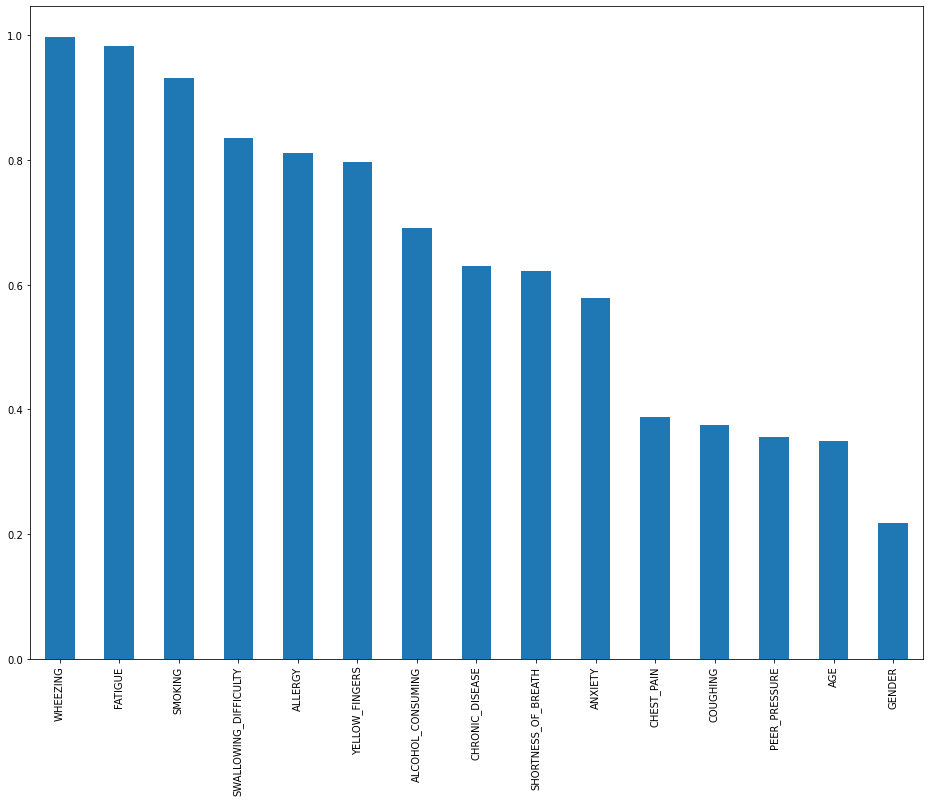

In [160]:
plt.figure(figsize=(16, 12))
p_values.plot.bar()

In [161]:
predictions=lr.predict(x_test)

In [162]:
rf_predictions=model.predict(x_test)

In [163]:
xgb_predictions=xgb_model.predict(x_test)

**13. For categorical data, calculate the accuracy and a confusion matrix.**

Ans: The F score is a metric for how accurate a model is on a given dataset. Below is the calculated F score **0.491, 0.501, 0.490** for all 3 methods used i.e. Logistic Regression, Random Forest Classifier and XGBoost respectively.

In [164]:
Logistic_F_Score = lr_fit.score(x_test, y_test)
print('Logistic F Score:',lr_fit.score(x_test, y_test))
#print('LASSO F Score:',lasso2_fit.score(X_test, y_test))
#print('Ridge F Score:',ridge2_fit.score(x_test, y_test))

RandomForestClassifier_F_Score = model.score(x_test, y_test)
print('Random Forest Classifier F Score:',model.score(x_test, y_test))

XGBOOST_F_Score = xgb_model.score(x_test, y_test)
print('XGBOOST F Score:',xgb_model.score(x_test, y_test))
#print('Neural Net F Score:',clf_fit.score(x_test, y_test))

Logistic F Score: 0.49119956674790144
Random Forest Classifier F Score: 0.5014893040888166
XGBOOST F Score: 0.49038721906309235


**Confusion Matrix**

In [165]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[3741 1745]
 [3892 1701]]


In [166]:
rf_cm = metrics.confusion_matrix(y_test,rf_predictions)
print(rf_cm)

[[2905 2581]
 [2942 2651]]


In [167]:
xgb_cm = metrics.confusion_matrix(y_test,xgb_predictions)
print(xgb_cm)

[[3452 2034]
 [3612 1981]]


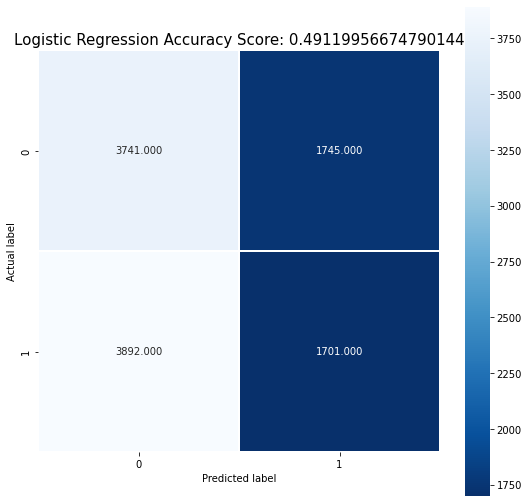

In [168]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Logistic Regression Accuracy Score: {0}'.format(Logistic_F_Score)
plt.title(all_sample_title, size = 15);

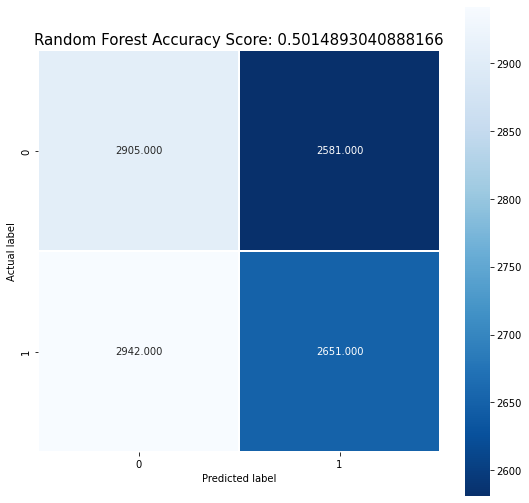

In [169]:
plt.figure(figsize=(9,9))
sns.heatmap(rf_cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Random Forest Accuracy Score: {0}'.format(RandomForestClassifier_F_Score)
plt.title(all_sample_title, size = 15);

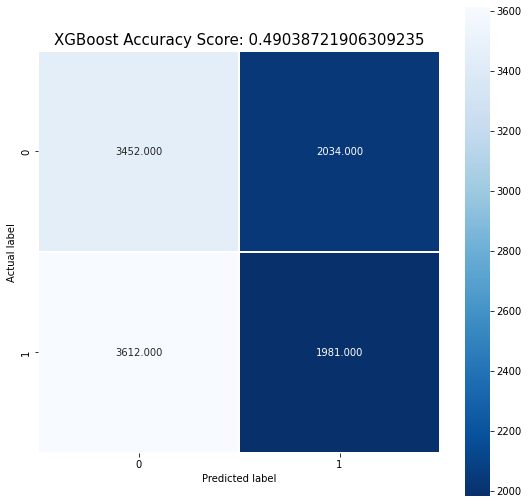

In [170]:
plt.figure(figsize=(9,9))
sns.heatmap(xgb_cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='XGBoost Accuracy Score: {0}'.format(XGBOOST_F_Score)
plt.title(all_sample_title, size = 15);

**11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

Ans: There are no outliers in the dataset, as seen in the box plots above for all predictor variables (except AGE) versus LUNG CANCER (target variable), as all values are between 0 and 1. Furthermore, there are no outliers in the box plot of AGE vs LUNG CANCER given below.

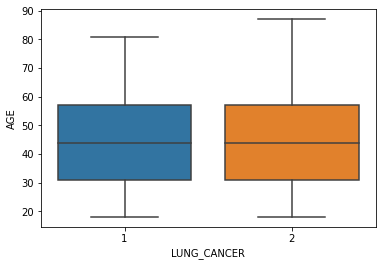

In [171]:
sns.boxplot(data=lung_df,x='LUNG_CANCER',y='AGE')

**Create Missing data:**

In [183]:
df_AGE = lung_df[['AGE']]
df_AGE['AGE_copy_1_percent'] = df_AGE[['AGE']]
df_AGE['AGE_copy_5_percent'] = df_AGE[['AGE']]
df_AGE['AGE_copy_10_percent'] = df_AGE[['AGE']]
df_AGE['sample_num'] = df_AGE[['AGE']]
df_AGE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,AGE,AGE_copy_1_percent,AGE_copy_5_percent,AGE_copy_10_percent,sample_num
0,69,69,69,69,69
1,74,74,74,74,74
2,59,59,59,59,59
3,63,63,63,63,63
4,63,63,63,63,63
...,...,...,...,...,...
55389,18,18,18,18,18
55390,60,60,60,60,60
55391,38,38,38,38,38
55392,26,26,26,26,26


In [184]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [185]:
print(get_percent_missing(df_AGE))

                             column_name  percent_missing
AGE                                  AGE              0.0
AGE_copy_1_percent    AGE_copy_1_percent              0.0
AGE_copy_5_percent    AGE_copy_5_percent              0.0
AGE_copy_10_percent  AGE_copy_10_percent              0.0
sample_num                    sample_num              0.0


In [177]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [186]:
create_missing(df_AGE, 0.01, 'AGE_copy_1_percent')
create_missing(df_AGE, 0.05, 'AGE_copy_5_percent')
create_missing(df_AGE, 0.1, 'AGE_copy_10_percent')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [187]:
print(get_percent_missing(df_AGE))

                             column_name  percent_missing
AGE                                  AGE         0.000000
AGE_copy_1_percent    AGE_copy_1_percent         1.000108
AGE_copy_5_percent    AGE_copy_5_percent         5.000542
AGE_copy_10_percent  AGE_copy_10_percent         9.999278
sample_num                    sample_num         0.000000


In [188]:
number_1_idx = list(np.where(df_AGE['AGE_copy_1_percent'].isna())[0])
number_5_idx = list(np.where(df_AGE['AGE_copy_5_percent'].isna())[0])
number_10_idx = list(np.where(df_AGE['AGE_copy_10_percent'].isna())[0])

**12.Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

Ans: Removed 1%, 5%, and 10% of your data randomly and imputed the values back using various imputation methods and observed that the missing values are recovered back by calculating average difference between the actual values and the imputed values.

**Method1**

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_AGE = pd.DataFrame(scaler.fit_transform(df_AGE))
df_AGE.head()

,0,1,2,3,4
0,0.739130,0.739130,0.809524,0.739130,0.739130
1,0.811594,0.811594,0.888889,0.811594,0.811594
2,0.594203,0.594203,0.650794,0.594203,0.594203
3,0.652174,0.652174,0.714286,0.652174,0.652174
4,0.652174,0.652174,0.714286,0.652174,0.652174


In [191]:
#knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_AGE = pd.DataFrame(imputer.fit_transform(df_AGE))

In [204]:
#checking for missing values
df_AGE.isnull().sum()
print('Values are filled with KNN Imputer successfully!')

Values are filled with KNN Imputer successfully!


In [196]:
#Calculating average difference between the actual values and the imputed values
print('Variance in 1% imputation column is - ', df_AGE[0].mean() - df_AGE[1].mean())
print('Variance in 5% imputation column is - ', df_AGE[0].mean() - df_AGE[2].mean())
print('Variance in 10% imputation column is - ', df_AGE[0].mean() - df_AGE[3].mean())

Variance in 1% imputation column is -  0.0
Variance in 5% imputation column is -  -0.03607466080718308
Variance in 10% imputation column is -  1.744202576814402e-07


**Method2:**

In [200]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [201]:
log_reg = LinearRegression()
imp = IterativeImputer(estimator=log_reg,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df=imp.fit_transform(df_AGE)

[IterativeImputer] Completing matrix with shape (55394, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.12
[IterativeImputer] Change: 0.0, scaled tolerance: 0.001 
[IterativeImputer] Early stopping criterion reached.


In [203]:
#checking for missing values
df_AGE.isnull().sum()
print('\n Values are filled with MICE Imputer successfully!')


 Values are filled with MICE Imputer successfully!


**References:**

https://towardsdatascience.com/feature-engineering-in-python-part-i-the-most-powerful-way-of-dealing-with-data-8e2447e7c69e

https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32

https://towardsdatascience.com/regression-or-classification-linear-or-logistic-f093e8757b9c

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

**Conclusion:**

Build a predictive model using Logistic regression, Random Forest and XGBoost to predict whether a patient has lung cancer based on a set of risk factors. Plotted histograms for distributions of all features. Plotted boxplots to observe outliers in the dataset. Computed p-values for all the independent variables is greater than 0.05, the relationship is statistically insignificant. As per the correlation matrix, no multicollinearity observed in the model. Hence, all predictor variables are independent of all other predictor variables. Calculated F score, confusion matrix to find accuracy of models on a given dataset.